## Ungraded Lab: Coding a Wide and Deep Model

In this lab, we'll show how you can implement a wide and deep model. We'll first look at how to build it with the Functional API then show how to encapsulate this into a class. Let's get started!

## Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

## Implement as a Class

Let's implement the wide and deep model as shown in class. As shown below, the Functional API is very flexible in implementing complex models.

You will specify the previous layer when you define a new layer.
When you define the Model, you will specify the inputs and output.

In [2]:
class WideAndDeepModel(nn.Module):
    def __init__(self):
        super(WideAndDeepModel, self).__init__()
        self.hidden_1 = nn.Linear(in_features=1, out_features=30)
        self.hidden_2 = nn.Linear(in_features=30, out_features=30)
        self.main_output = nn.Linear(in_features=31, out_features=1)
        self.aux_output = nn.Linear(in_features=30, out_features=1)
    
    def forward(self, inputs):
        input_A, input_B = inputs
        print(f"input_A: {input_A}, input_B: {input_B}")
        
        hidden1 = self.hidden_1(input_B)
        hidden2 = self.hidden_2(hidden1)
        print(f"hidden1: {hidden1.shape}, hidden2: {hidden2.shape}")
        
        concat = torch.cat((input_A, hidden2), 0)
        print(f"concat: {concat.shape}")
        
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output

In [3]:
# Print Model
model = WideAndDeepModel()
print(model)

WideAndDeepModel(
  (hidden_1): Linear(in_features=1, out_features=30, bias=True)
  (hidden_2): Linear(in_features=30, out_features=30, bias=True)
  (main_output): Linear(in_features=31, out_features=1, bias=True)
  (aux_output): Linear(in_features=30, out_features=1, bias=True)
)


In [4]:
# Sample input and model verification
x = np.array([[1.], [2.]], dtype=np.float32)
x = torch.from_numpy(x)

main_output, aux_output = model(x)
print(main_output.shape, aux_output.shape)

input_A: tensor([1.]), input_B: tensor([2.])
hidden1: torch.Size([30]), hidden2: torch.Size([30])
concat: torch.Size([31])
torch.Size([1]) torch.Size([1])


## Visualize Model Architecture using TensorBoard

In [5]:
%load_ext tensorboard

In [6]:
writer = SummaryWriter('runs/model')
writer.add_graph(model, x)
writer.close()

input_A: tensor([1.]), input_B: tensor([2.])
hidden1: torch.Size([30]), hidden2: torch.Size([30])
concat: torch.Size([31])
input_A: tensor([1.]), input_B: tensor([2.])
hidden1: torch.Size([30]), hidden2: torch.Size([30])
concat: torch.Size([31])
input_A: tensor([1.]), input_B: tensor([2.])
hidden1: torch.Size([30]), hidden2: torch.Size([30])
concat: torch.Size([31])


/var/folders/rk/3j211bj53lb3k3wgfh02x3p80000gn/T/ipykernel_4148/505679508.py:10: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  input_A, input_B = inputs


In [7]:
!tensorboard --logdir=runs


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.7.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


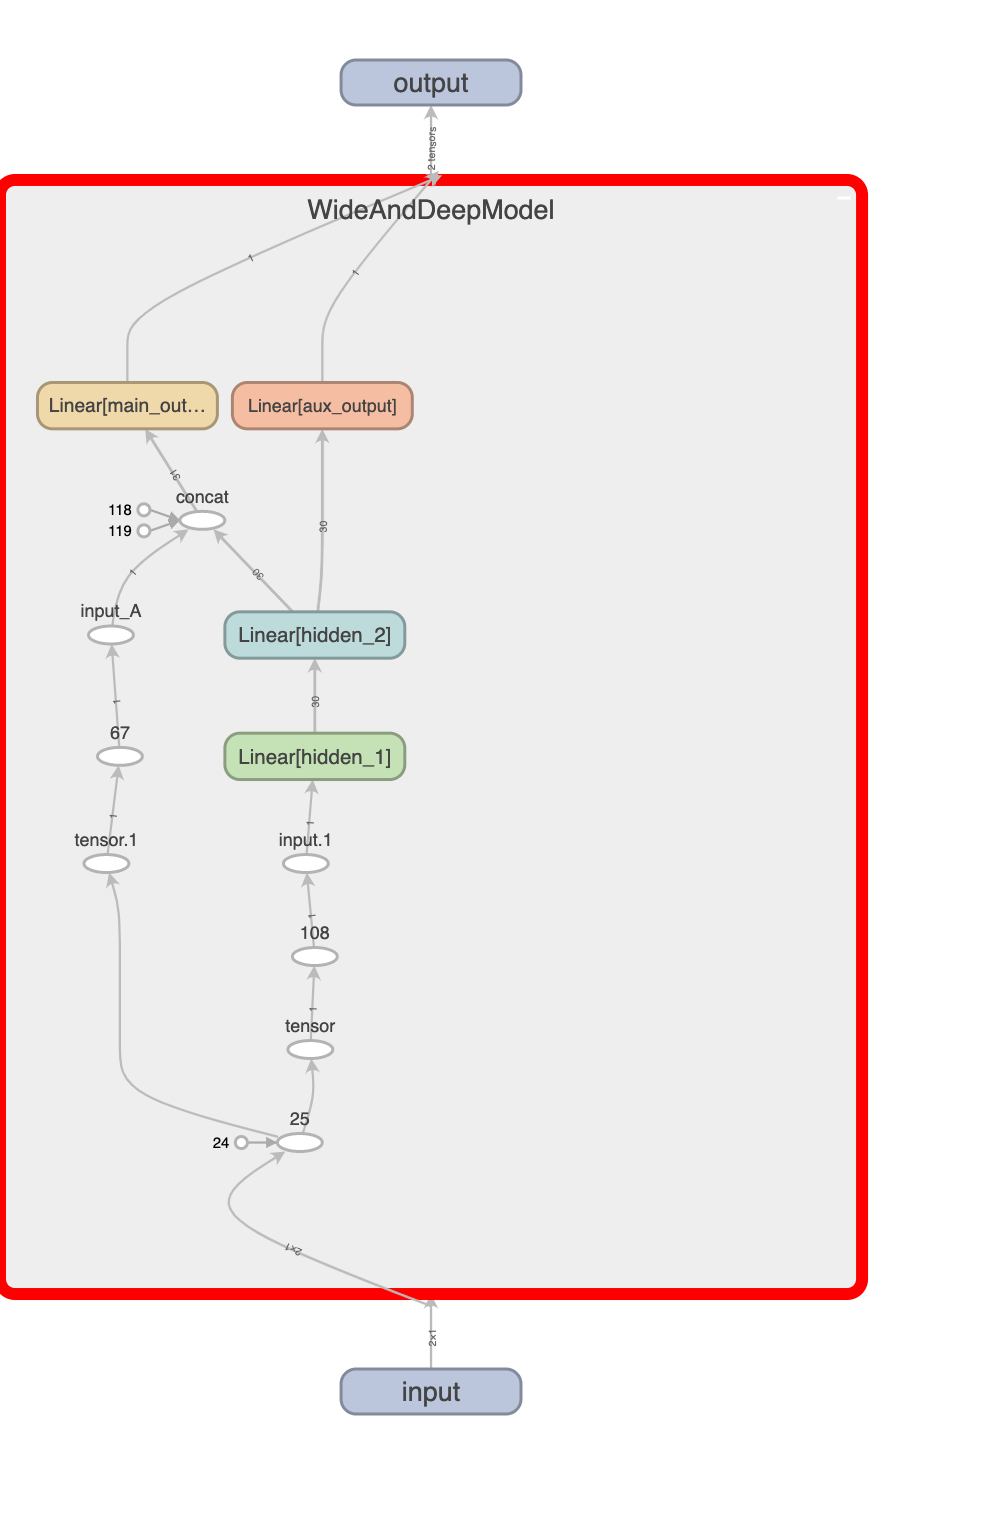

In [8]:
from IPython.display import Image
Image(filename='model.png')